In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import datetime

In [2]:
df = pd.read_excel("Online Retail.xlsx")
df.shape

(541909, 8)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df["CustomerID"].isna().sum()

135080

In [6]:
df = df[pd.notnull(df["CustomerID"])]
df.shape

(406829, 8)

In [7]:
countries = df[["Country", "CustomerID"]].drop_duplicates()
countries.shape

(4380, 2)

In [8]:
countries.head()

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


In [9]:
countries["Country"].value_counts()

United Kingdom          3950
Germany                   95
France                    87
Spain                     31
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Channel Islands            9
Australia                  9
Netherlands                9
Denmark                    9
Sweden                     8
Cyprus                     8
Japan                      8
Poland                     6
Israel                     4
Greece                     4
USA                        4
Canada                     4
Unspecified                4
EIRE                       3
Malta                      2
Bahrain                    2
United Arab Emirates       2
Iceland                    1
Brazil                     1
European Community         1
Saudi Arabia               1
Czech Republic             1
Lebanon                    1
Singapore     

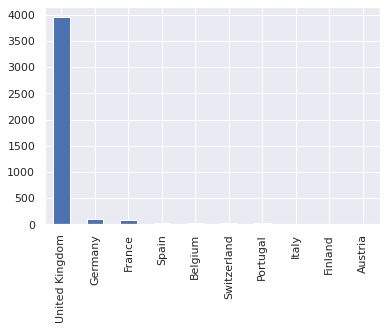

In [10]:
countries["Country"].value_counts()[:10].plot(kind="bar")
plt.show()

In [11]:
uk_df = df[df["Country"] == "United Kingdom"]
uk_df.shape

(361878, 8)

In [12]:
uk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      361878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [13]:
uk_df.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
uk_df = uk_df[uk_df["Quantity"] > 0]
uk_df.shape

(354345, 8)

In [15]:
uk_df = uk_df[["CustomerID","InvoiceDate", "InvoiceNo", "Quantity", "UnitPrice"]]

In [16]:
uk_df["TotalPrice"] = uk_df["Quantity"] * uk_df["UnitPrice"]

In [17]:
uk_df["InvoiceDate"].min(), uk_df["InvoiceDate"].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [18]:
uk_df['InvoiceDate'] = pd.to_datetime(uk_df['InvoiceDate'])

In [19]:
uk_df.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [20]:
snapshot_date = max(uk_df["InvoiceDate"]) + datetime.timedelta(days=1)
rfm = uk_df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "InvoiceNo": "count",
    "TotalPrice": "sum"
})

In [21]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'TotalPrice'], dtype='object')

In [22]:
rfm.columns = ["recency", "frequency", "monetary"]

In [23]:
rfm["recency"] = rfm["recency"].astype(int)

In [24]:
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,326,1,77183.60
12747.0,2,103,4196.01
12748.0,1,4596,33719.73
12749.0,4,199,4090.88
12820.0,3,59,942.34


In [25]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [26]:
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,326,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,1,4596,33719.73,1,1,1
12749.0,4,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [27]:
rfm["RFM_Score"] = rfm["r_quartile"].astype(str)+ rfm["f_quartile"].astype(str) + rfm["m_quartile"].astype(str)

In [28]:
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,1,4596,33719.73,1,1,1,111
12749.0,4,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


In [29]:
rfm["RFM_Score"].max(), rfm["RFM_Score"].min()

('444', '111')

In [30]:
rfm[rfm["RFM_Score"]=="111"].sort_values("monetary", ascending=False).head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
18102.0,1,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
17511.0,3,963,91062.38,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111
